# AI 600 - Assignment 1: 

**Name: Muhammad Adnan** 

**Roll Number: 25280067**


## **Question 1:**  Feedforward Neural Networks using Tabular Data

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
                                    
df = pd.read_csv('data/raw/train.csv')
print("Dataset loaded successfully.\n")

print("Dataset shape:")
print(df.shape)
print("\nDataframe Head:")
print(df.head())

print("\nData Types:")
print(df.dtypes)


Dataset loaded successfully.

Dataset shape:
(41348, 7)

Dataframe Head:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  price_class  
0               15.0             254.0            3  
1                1.0               0.0            1  
2               70.0              90.0            1  
3                1.0               NaN            1  
4                0.0              89.0            1  

Data Types:
neighbourhood_group        str
room_type                  str
minimum_nights         float64
amenity_score          float64
number_of_reviews      floa

In [3]:
print("Dataset Structure:\n")
print(f"Number of samples: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print(f"Number of features: {df.shape[1] - 1}\n")  

print("Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

print("Dataset Information:")
df.info()
print("\n" + "="*50 + "\n")

print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50 + "\n")




Dataset Structure:

Number of samples: 41348
Total columns: 7
Number of features: 6

Data Types:
neighbourhood_group        str
room_type                  str
minimum_nights         float64
amenity_score          float64
number_of_reviews      float64
availability_365       float64
price_class              int64
dtype: object


Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  str    
 1   room_type            40737 non-null  str    
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), str(2)
memory usage: 2.2 MB


Statistical Summary:
       minimum_nights

In [4]:
print("Missing Values Analysis:")
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_info)



Missing Values Analysis:
                     Missing Count  Percentage
neighbourhood_group            839        2.03
room_type                      611        1.48
minimum_nights                1322        3.20
amenity_score                  916        2.22
number_of_reviews             1123        2.72
availability_365               595        1.44
price_class                      0        0.00


In [5]:
print("\nDuplicate Rows Analysis:")
dup_count = df.duplicated().sum()
all_dup_rows = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
print(f"Total number of duplicate rows: {all_dup_rows.shape[0]}")
print(f"Number of unique samples within duplicate rows: {dup_count}\n")
if dup_count > 0:
    print("Sample duplicate rows:")
    print(all_dup_rows.head())


Duplicate Rows Analysis:
Total number of duplicate rows: 1252
Number of unique samples within duplicate rows: 683

Sample duplicate rows:
      neighbourhood_group        room_type  minimum_nights  amenity_score  \
15078            Brooklyn  Entire home/apt             1.0           30.1   
32362            Brooklyn  Entire home/apt             1.0           30.1   
27712            Brooklyn  Entire home/apt             1.0           31.9   
36681            Brooklyn  Entire home/apt             1.0           31.9   
8129             Brooklyn  Entire home/apt             1.0           34.3   

       number_of_reviews  availability_365  price_class  
15078                1.0               0.0            1  
32362                1.0               0.0            1  
27712                0.0               0.0            1  
36681                0.0               0.0            1  
8129                 0.0               0.0            1  


In [6]:
target_cols = ['price_class']
feature_cols = [c for c in df.columns if c not in target_cols]

                                                                                         
duplicate_rows_excl_target = df[df.duplicated(subset=feature_cols, keep=False)].sort_values(by=feature_cols)
duplicate_rows_excl_target

,neighbourhood_group,room_type,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class
15078,Brooklyn,Entire home/apt,1.0,30.1,1.0,0.0,1
32362,Brooklyn,Entire home/apt,1.0,30.1,1.0,0.0,1
27712,Brooklyn,Entire home/apt,1.0,31.9,0.0,0.0,1
36681,Brooklyn,Entire home/apt,1.0,31.9,0.0,0.0,1
8129,Brooklyn,Entire home/apt,1.0,34.3,0.0,0.0,1
...,...,...,...,...,...,...,...
24306,Queens,Private room,5.0,NaN,0.0,0.0,1
1718,Queens,Private room,10.0,NaN,1.0,0.0,0
28770,Queens,Private room,10.0,NaN,1.0,0.0,0
22940,NaN,Private room,1.0,18.1,0.0,0.0,0


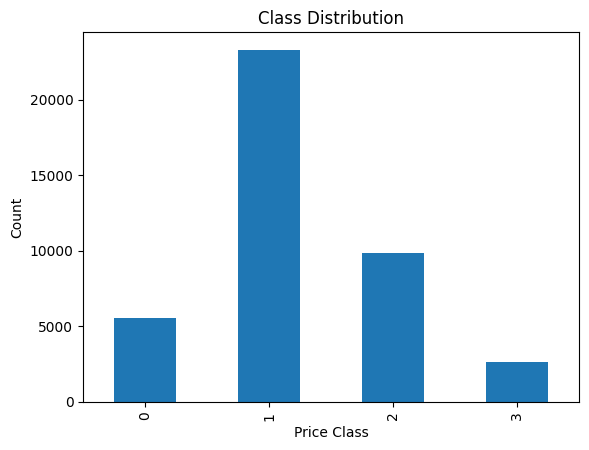

In [7]:
plt.figure()
df['price_class'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Price Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

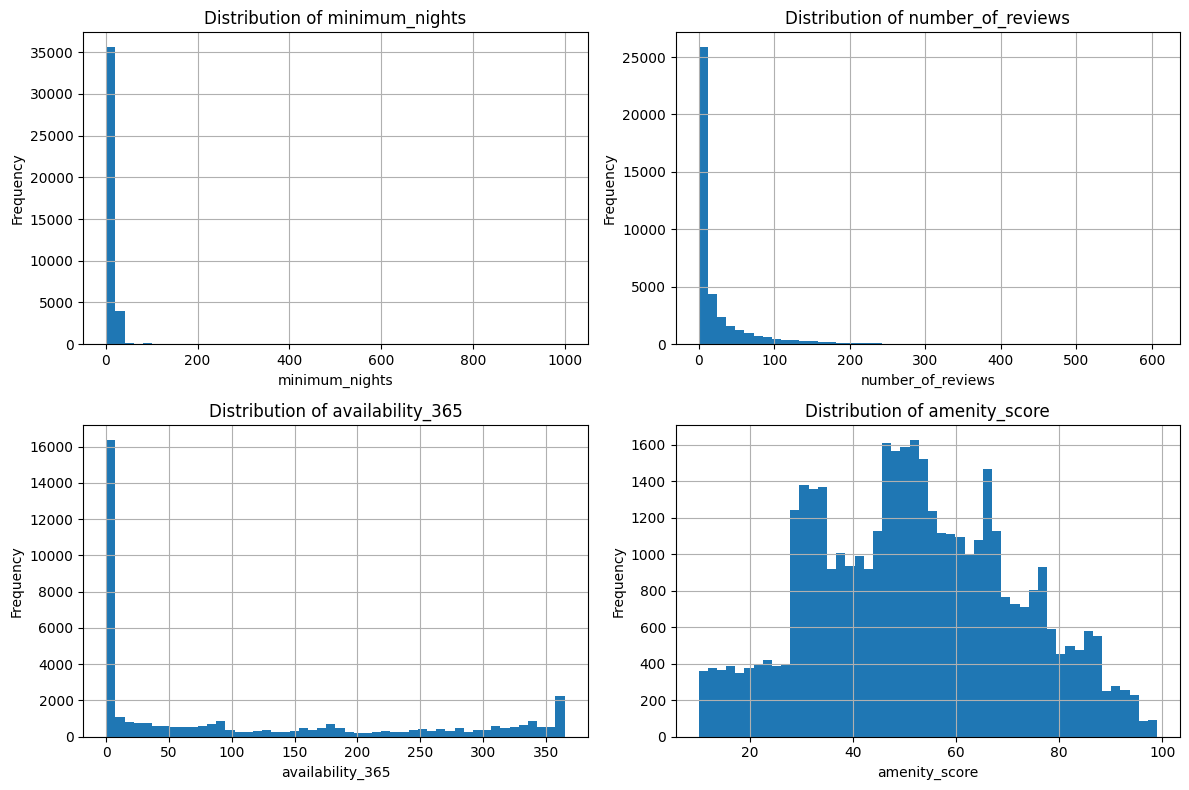

In [8]:

numerical_cols = [
    'minimum_nights',
    'number_of_reviews',
    'availability_365',
    'amenity_score'
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].dropna().hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/var/folders/_l/x4qfltcj1hsdfhttyp77hs_40000gn/T/ipykernel_30475/2635290663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_class', y=col, ax=axes[idx], palette='Set2', width=0.6)
/var/folders/_l/x4qfltcj1hsdfhttyp77hs_40000gn/T/ipykernel_30475/2635290663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_class', y=col, ax=axes[idx], palette='Set2', width=0.6)
/var/folders/_l/x4qfltcj1hsdfhttyp77hs_40000gn/T/ipykernel_30475/2635290663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pri

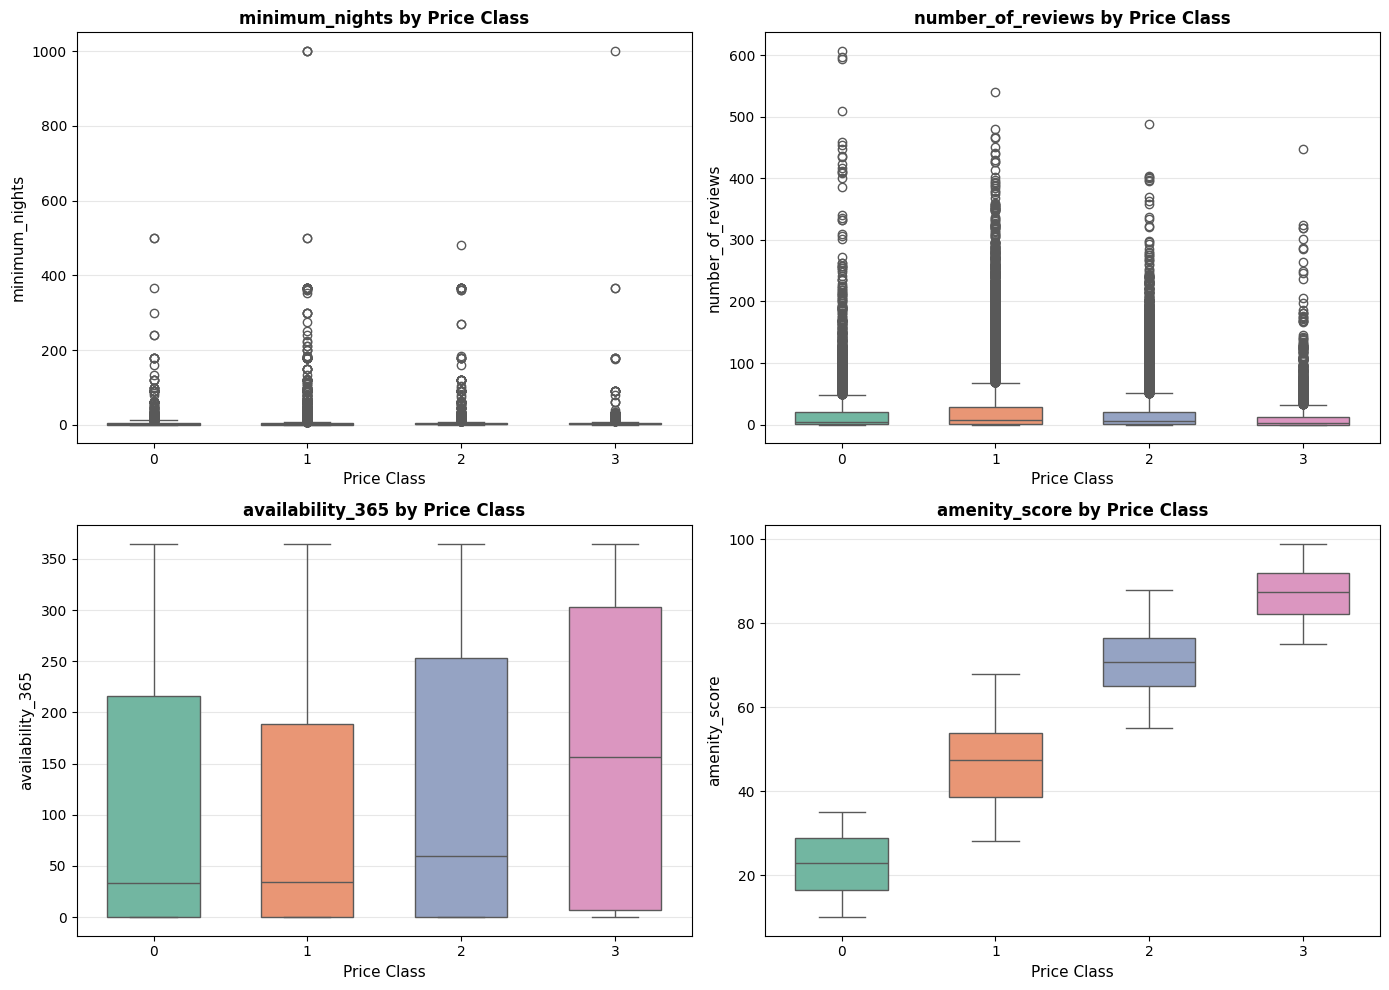

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='price_class', y=col, ax=axes[idx], palette='Set2', width=0.6)
    axes[idx].set_title(f'{col} by Price Class', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Price Class', fontsize=11)
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


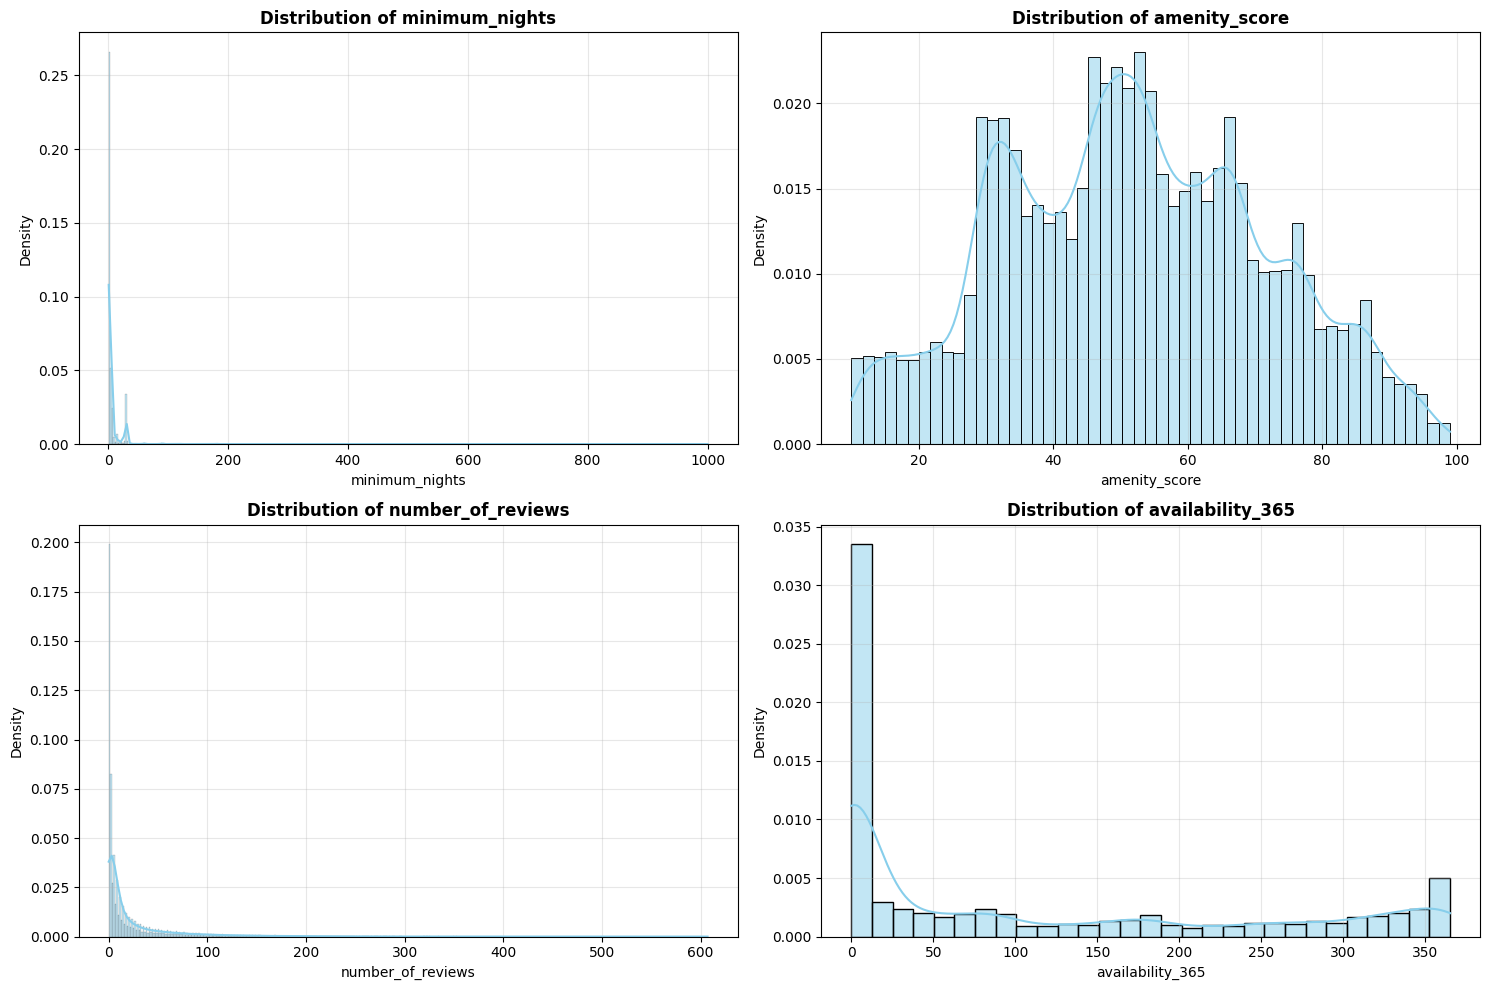

In [10]:
                                                   
                                                  
                     

numerical_features = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

                                                    
                                      
                                 
    
                                                    
                                                                                                
    
                                                   
                                                                                
    
                                                                                       
                                   
                                     
                        
                                     

                    
            

                                                           
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[idx], color='skyblue', stat='density')
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

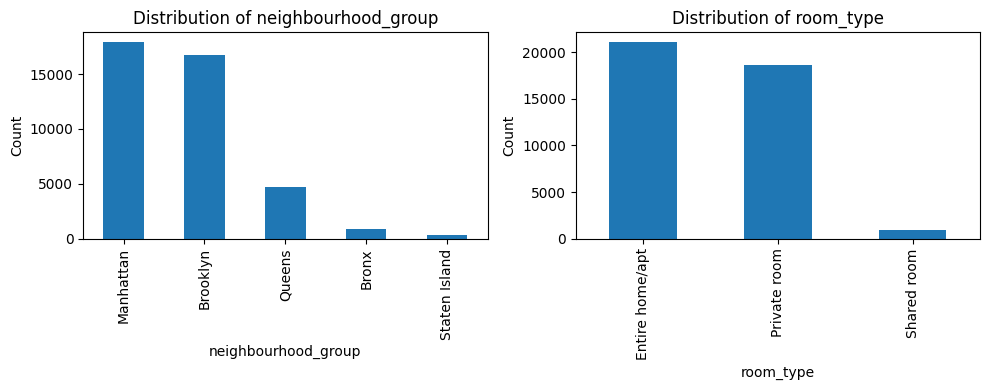

In [11]:
categorical_cols = ['neighbourhood_group', 'room_type']

plt.figure(figsize=(10, 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

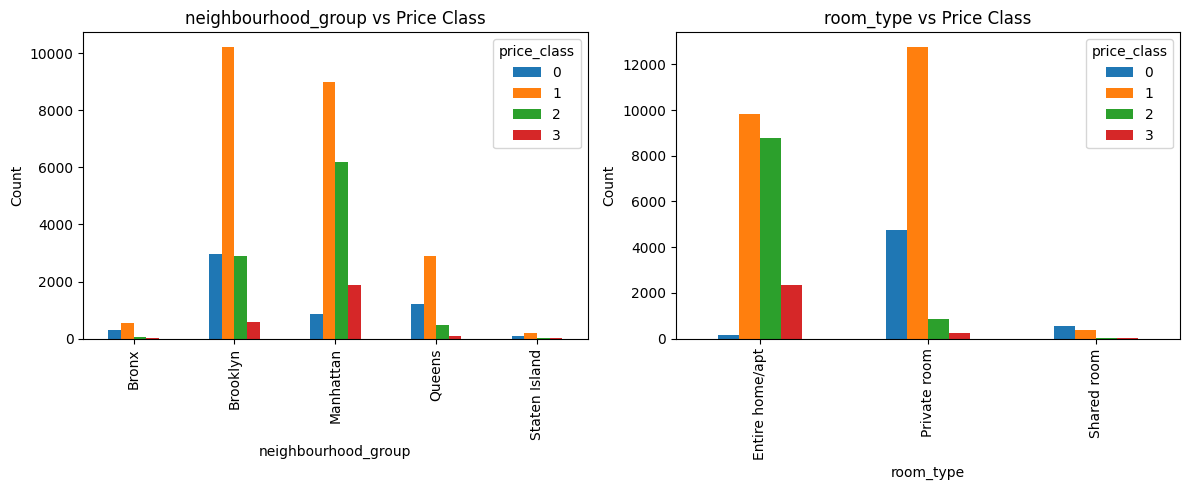

In [12]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    pd.crosstab(df[col], df['price_class']).plot(kind='bar', ax=plt.gca())
    plt.title(f'{col} vs Price Class')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

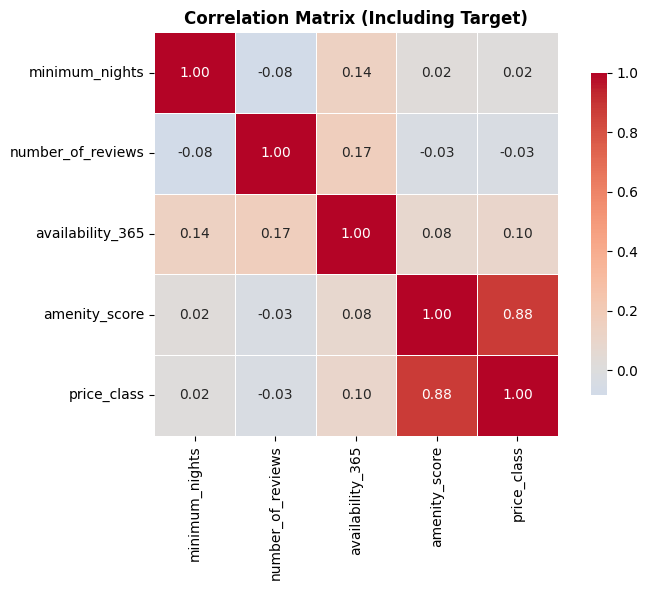

                   minimum_nights  number_of_reviews  availability_365  \
minimum_nights           1.000000          -0.084337          0.140268   
number_of_reviews       -0.084337           1.000000          0.173839   
availability_365         0.140268           0.173839          1.000000   
amenity_score            0.023231          -0.030326          0.081418   
price_class              0.015818          -0.034141          0.096385   

                   amenity_score  price_class  
minimum_nights          0.023231     0.015818  
number_of_reviews      -0.030326    -0.034141  
availability_365        0.081418     0.096385  
amenity_score           1.000000     0.875322  
price_class             0.875322     1.000000  


In [13]:
                                         
corr = df[numerical_cols + target_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix (Including Target)", fontweight="bold")
plt.tight_layout()
plt.show()

print(corr)


In [14]:
                                              
neigh_prop = pd.crosstab(
    df['neighbourhood_group'],
    df['price_class'],
    normalize='index'
)

print("Neighbourhood Group vs Price Class (Proportions)")
print(neigh_prop)

print("\n")

                                    
room_prop = pd.crosstab(
    df['room_type'],
    df['price_class'],
    normalize='index'
)

print("Room Type vs Price Class (Proportions)")
print(room_prop)


Neighbourhood Group vs Price Class (Proportions)
price_class                 0         1         2         3
neighbourhood_group                                        
Bronx                0.340684  0.589857  0.048512  0.020948
Brooklyn             0.178469  0.612090  0.174035  0.035406
Manhattan            0.047752  0.501145  0.345323  0.105781
Queens               0.261286  0.619463  0.102215  0.017036
Staten Island        0.281553  0.595469  0.106796  0.016181


Room Type vs Price Class (Proportions)
price_class             0         1         2         3
room_type                                              
Entire home/apt  0.007394  0.464951  0.416323  0.111332
Private room     0.255800  0.683974  0.046831  0.013395
Shared room      0.565128  0.379487  0.038974  0.016410


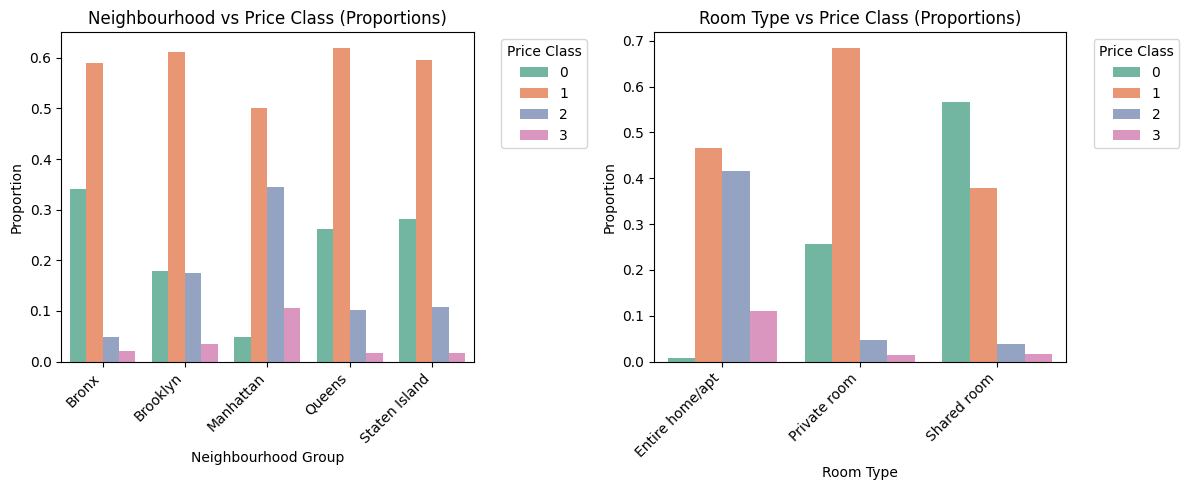

In [15]:
plt.figure(figsize=(12, 5))

                           
neigh_long = (
    neigh_prop.reset_index()
    .melt(id_vars='neighbourhood_group', var_name='price_class', value_name='proportion')
)
plt.subplot(1, 2, 1)
sns.barplot(data=neigh_long, x='neighbourhood_group', y='proportion', hue='price_class', palette='Set2')
plt.title("Neighbourhood vs Price Class (Proportions)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Class', bbox_to_anchor=(1.05, 1), loc='upper left')

                       
room_long = (
    room_prop.reset_index()
    .melt(id_vars='room_type', var_name='price_class', value_name='proportion')
)
plt.subplot(1, 2, 2)
sns.barplot(data=room_long, x='room_type', y='proportion', hue='price_class', palette='Set2')
plt.title("Room Type vs Price Class (Proportions)")
plt.xlabel("Room Type")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [16]:
print("Dataframe shape before removing duplicates:", df.shape)
dup_count_before = df.duplicated().sum()
df = df.drop_duplicates()
dup_count_after = df.duplicated().sum()
print("Dataframe shape after removing duplicates:", df.shape)
print(f"Number of rows dropped: {dup_count_before - dup_count_after}")


Dataframe shape before removing duplicates: (41348, 7)
Dataframe shape after removing duplicates: (40665, 7)
Number of rows dropped: 683


In [17]:
from sklearn.model_selection import train_test_split

                              
X = df.drop('price_class', axis=1)
y = df['price_class']

                                              
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

print("\nTraining class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation class distribution:")
print(y_val.value_counts(normalize=True))


Training set shape: (32532, 6)
Validation set shape: (8133, 6)

Training class distribution:
price_class
1    0.561847
2    0.238596
0    0.134790
3    0.064767
Name: proportion, dtype: float64

Validation class distribution:
price_class
1    0.561908
2    0.238534
0    0.134760
3    0.064798
Name: proportion, dtype: float64


In [18]:
numerical_cols = [
    'minimum_nights',
    'number_of_reviews',
    'availability_365',
    'amenity_score'
]

categorical_cols = [
    'neighbourhood_group',
    'room_type'
]

median_values = X_train[numerical_cols].median()
print("Median values for numerical features:")
print(f"{median_values}\n")

X_train[numerical_cols] = X_train[numerical_cols].fillna(median_values)

X_val[numerical_cols] = X_val[numerical_cols].fillna(median_values)

print("Remaining missing values in TRAIN (numerical):")
print(X_train[numerical_cols].isnull().sum())

print("\nRemaining missing values in VALIDATION (numerical):")
print(X_val[numerical_cols].isnull().sum())

Median values for numerical features:
minimum_nights        3.0
number_of_reviews     6.0
availability_365     49.0
amenity_score        51.5
dtype: float64

Remaining missing values in TRAIN (numerical):
minimum_nights       0
number_of_reviews    0
availability_365     0
amenity_score        0
dtype: int64

Remaining missing values in VALIDATION (numerical):
minimum_nights       0
number_of_reviews    0
availability_365     0
amenity_score        0
dtype: int64


Handle Missign Values - Numerical Data

In [19]:
                                           
X_train[categorical_cols] = X_train[categorical_cols].fillna("Unknown")
X_val[categorical_cols] = X_val[categorical_cols].fillna("Unknown")

print("Remaining missing values in TRAIN (categorical):")
print(X_train[categorical_cols].isnull().sum())

print("\nRemaining missing values in VALIDATION (categorical):")
print(X_val[categorical_cols].isnull().sum())


Remaining missing values in TRAIN (categorical):
neighbourhood_group    0
room_type              0
dtype: int64

Remaining missing values in VALIDATION (categorical):
neighbourhood_group    0
room_type              0
dtype: int64


<font color="#7584ab">**Handle Missign Values - Categorical Data**</font>

In [20]:
X_train[categorical_cols] = X_train[categorical_cols].fillna("Unknown")
X_val[categorical_cols] = X_val[categorical_cols].fillna("Unknown")

print("Remaining missing values in Train (categorical):")
print(X_train[categorical_cols].isnull().sum())

print("\nRemaining missing values in Validation (categorical):")
print(X_val[categorical_cols].isnull().sum())

Remaining missing values in Train (categorical):
neighbourhood_group    0
room_type              0
dtype: int64

Remaining missing values in Validation (categorical):
neighbourhood_group    0
room_type              0
dtype: int64


In [21]:
print(X_train.isnull().sum())
print(X_val.isnull().sum())

neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
dtype: int64
neighbourhood_group    0
room_type              0
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
dtype: int64


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoder.fit(X_train[categorical_cols])

X_train_encoded = encoder.transform(X_train[categorical_cols])  
X_val_encoded = encoder.transform(X_val[categorical_cols])  

encoded_feature_names = encoder.get_feature_names_out(categorical_cols)


X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_feature_names, index=X_val.index)

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded_df], axis=1)
X_val_final = pd.concat([X_val[numerical_cols], X_val_encoded_df], axis=1)

print("Training set shape after encoding:", X_train_final.shape)
print("Validation set shape after encoding:", X_val_final.shape)

Training set shape after encoding: (32532, 14)
Validation set shape after encoding: (8133, 14)


In [23]:
print("Columns match:", list(X_train_final.columns) == list(X_val_final.columns))


Columns match: True


**Standarisation**

In [24]:
from sklearn.preprocessing import StandardScaler

                   
scaler = StandardScaler()

                                                
scaler.fit(X_train[numerical_cols])

                                                  
X_train_scaled = scaler.transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])

                           
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=numerical_cols,
    index=X_train.index
)

X_val_scaled_df = pd.DataFrame(
    X_val_scaled,
    columns=numerical_cols,
    index=X_val.index
)


In [25]:
                                                                     
X_train_final = pd.concat(
    [X_train_scaled_df, X_train_encoded_df],
    axis=1
)

X_val_final = pd.concat(
    [X_val_scaled_df, X_val_encoded_df],
    axis=1
)

print("Final TRAIN shape:", X_train_final.shape)
print("Final VALIDATION shape:", X_val_final.shape)


Final TRAIN shape: (32532, 14)
Final VALIDATION shape: (8133, 14)


In [26]:
print("Mean (train):")
print(X_train_final[numerical_cols].mean())

print("\nStd (train):")
print(X_train_final[numerical_cols].std())


Mean (train):
minimum_nights       1.976642e-17
number_of_reviews   -8.299712e-18
availability_365     6.989231e-18
amenity_score       -2.542333e-16
dtype: float64

Std (train):
minimum_nights       1.000015
number_of_reviews    1.000015
availability_365     1.000015
amenity_score        1.000015
dtype: float64


In [27]:
X_train_final.to_csv("data/processed/X_train_processed.csv", index=False)
X_val_final.to_csv("data/processed/X_val_processed.csv", index=False)

              
y_train.to_csv("data/processed/y_train.csv", index=False)
y_val.to_csv("data/processed/y_val.csv", index=False)

print("Processed datasets has successfully been saved.")

Processed datasets has successfully been saved.
